u159_NNHonly

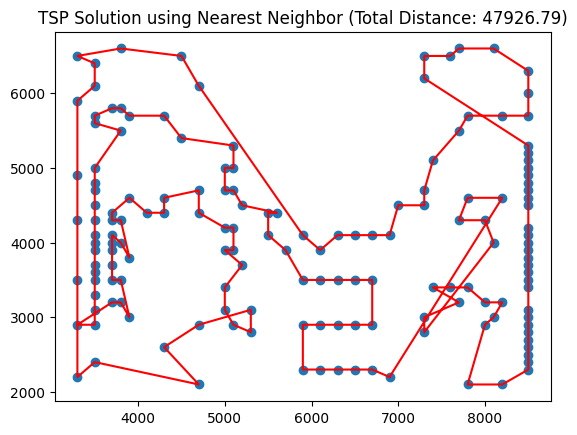

Time taken to render: 0.6887056827545166 seconds




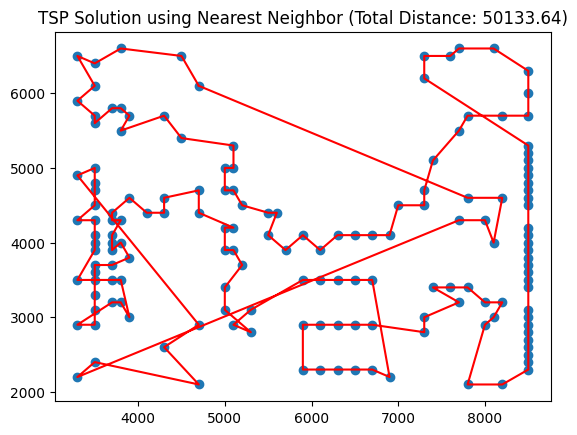

Time taken to render: 0.4779205322265625 seconds




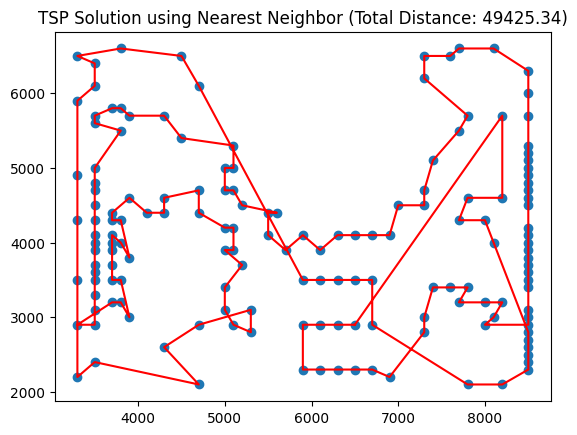

Time taken to render: 0.40180277824401855 seconds




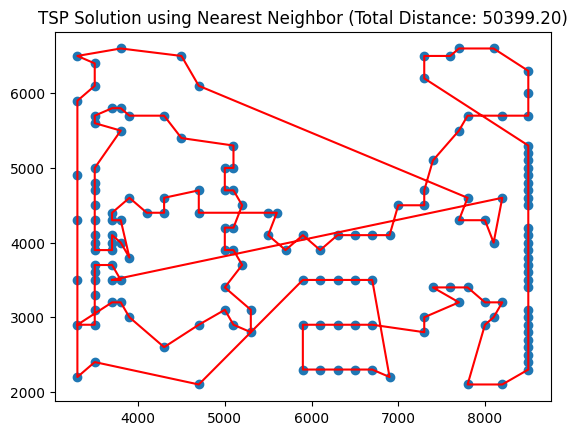

Time taken to render: 0.4163212776184082 seconds




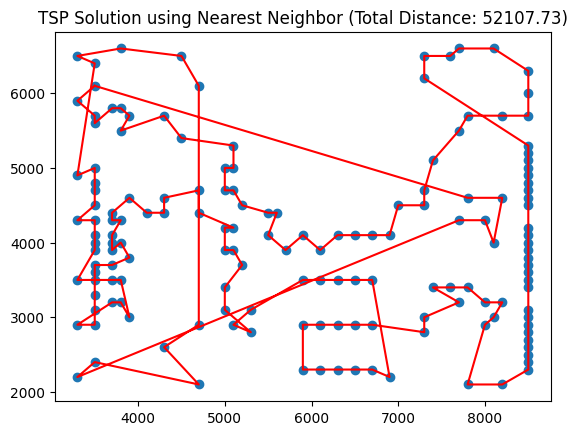

Time taken to render: 0.4422776699066162 seconds




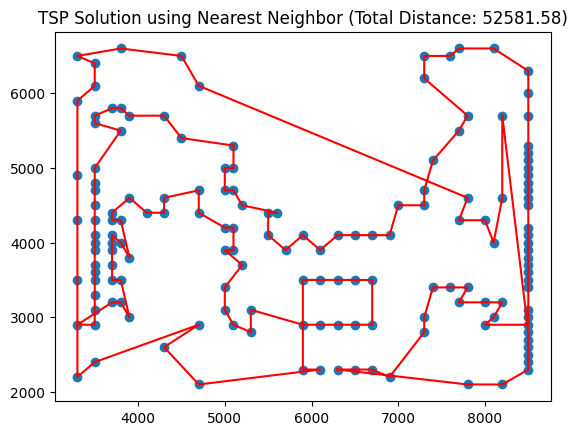

Time taken to render: 0.4581613540649414 seconds




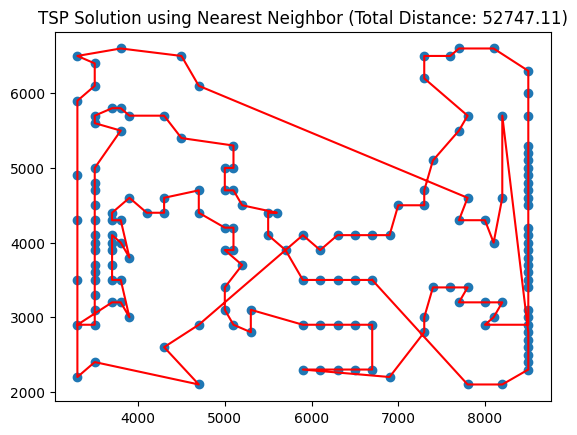

Time taken to render: 0.4160888195037842 seconds




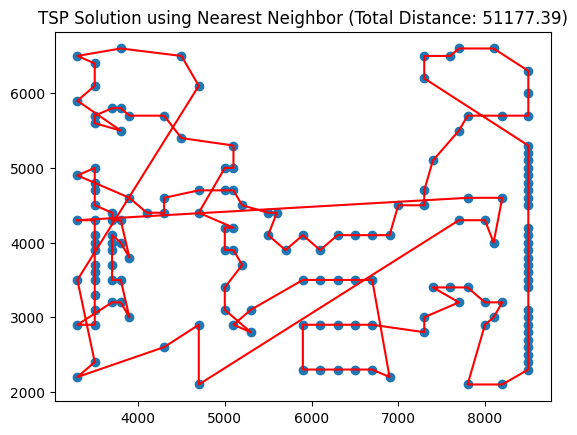

Time taken to render: 0.4289579391479492 seconds




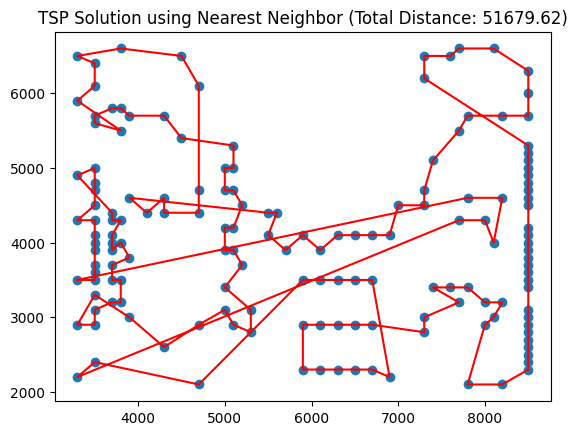

Time taken to render: 0.4272420406341553 seconds




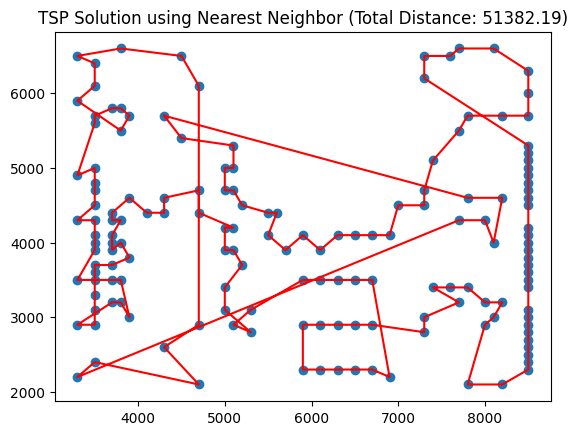

Time taken to render: 0.3915235996246338 seconds


Average Tour Length: 50956.05852349939
Time taken to render: 0.3917820453643799 seconds


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'(\d+)\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "u159.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


u159_NNHwith2OPT

Iteration 293: Improved total distance to 49962.20
Iteration 936: Improved total distance to 49807.37
Iteration 6407: Improved total distance to 49662.53
Iteration 6759: Improved total distance to 49542.60
Iteration 6813: Improved total distance to 49395.07
Iteration 6838: Improved total distance to 48765.50
Iteration 7754: Improved total distance to 48395.07
Iteration 9163: Improved total distance to 46842.69
Iteration 9911: Improved total distance to 46810.35
Iteration 10605: Improved total distance to 46638.36
Iteration 10606: Improved total distance to 46470.91
Iteration 10665: Improved total distance to 46210.35
Iteration 10780: Improved total distance to 46181.17
Iteration 10783: Improved total distance to 46136.37
Iteration 11001: Improved total distance to 46019.21
Iteration 11061: Improved total distance to 45880.13
Iteration 11684: Improved total distance to 45762.97
Iteration 12025: Improved total distance to 45454.69
Iteration 12285: Improved total distance to 45411.69
Iter

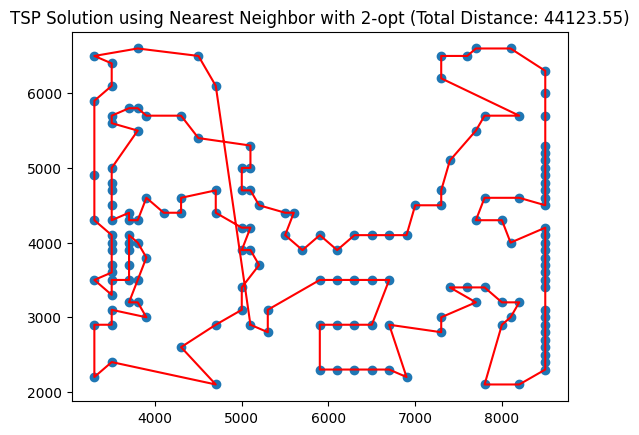

Time taken to render: 59.531394720077515 seconds


Iteration 2525: Improved total distance to 50933.25
Iteration 2533: Improved total distance to 49488.27
Iteration 3494: Improved total distance to 49453.75
Iteration 3495: Improved total distance to 49428.75
Iteration 5614: Improved total distance to 49283.92
Iteration 5846: Improved total distance to 49260.70
Iteration 5847: Improved total distance to 49190.23
Iteration 6537: Improved total distance to 48992.19
Iteration 6735: Improved total distance to 48844.56
Iteration 7683: Improved total distance to 48721.59
Iteration 7684: Improved total distance to 48505.11
Iteration 7781: Improved total distance to 48352.33
Iteration 7845: Improved total distance to 48210.41
Iteration 8402: Improved total distance to 48136.42
Iteration 8490: Improved total distance to 48024.11
Iteration 9328: Improved total distance to 48016.40
Iteration 9869: Improved total distance to 47856.98
Iteration 10870: Improved total distance to 47682.33
Iteration 10

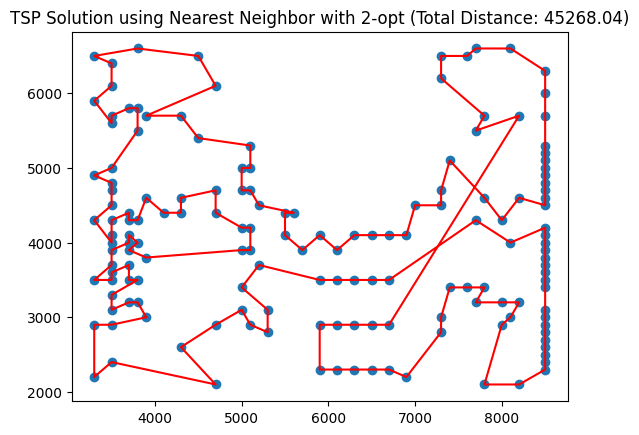

Time taken to render: 107.02271962165833 seconds


Average Tour Length: 44695.792181358214
Time taken to render: 107.02327179908752 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "u159.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(2):
    start_time = time.time()
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


u159_NNHwith3OPT

Iteration 4909: Improved total distance to 51666.52
Iteration 11137: Improved total distance to 51595.04
Iteration 11803: Improved total distance to 51131.80
Iteration 11960: Improved total distance to 50380.15
Iteration 90280: Improved total distance to 50322.10
Iteration 122983: Improved total distance to 50182.07
Iteration 295066: Improved total distance to 49956.32
Iteration 367167: Improved total distance to 49561.42
Iteration 367715: Improved total distance to 49201.92
Iteration 373674: Improved total distance to 48829.18
Iteration 448941: Improved total distance to 48803.82
Iteration 460117: Improved total distance to 48674.47
Iteration 572775: Improved total distance to 48221.76
Iteration 617718: Improved total distance to 48160.69
Iteration 618284: Improved total distance to 48133.32
Iteration 618480: Improved total distance to 47940.78
Iteration 700973: Improved total distance to 47506.52
Iteration 907871: Improved total distance to 47208.95
Iteration 907991: Improved total d

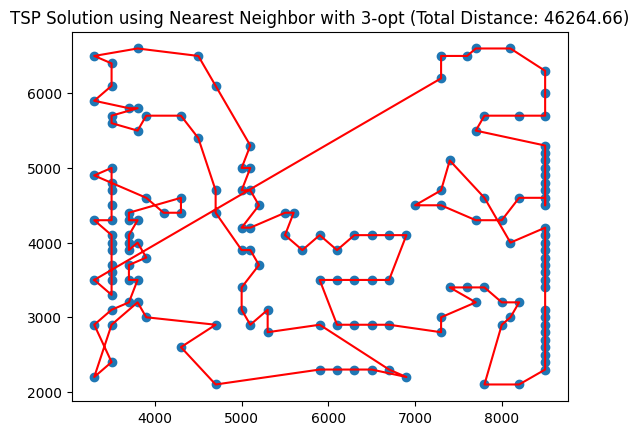

Time taken to render: 2711.087078809738 seconds


Iteration 143: Improved total distance to 51086.86
Iteration 719: Improved total distance to 51071.89
Iteration 11306: Improved total distance to 50980.84
Iteration 80437: Improved total distance to 50944.92
Iteration 141146: Improved total distance to 50907.14
Iteration 182773: Improved total distance to 50635.08
Iteration 183700: Improved total distance to 50566.25
Iteration 246475: Improved total distance to 50553.97
Iteration 398807: Improved total distance to 50529.24
Iteration 398814: Improved total distance to 50432.41
Iteration 398915: Improved total distance to 50161.82
Iteration 404801: Improved total distance to 50044.67
Iteration 514629: Improved total distance to 49971.85
Iteration 514712: Improved total distance to 49895.69
Iteration 570510: Improved total distance to 49825.17
Iteration 617718: Improved total distance to 49764.10
Iteration 618284: Improved total distance to 49736.73
Iteration 618480: Improved total distanc

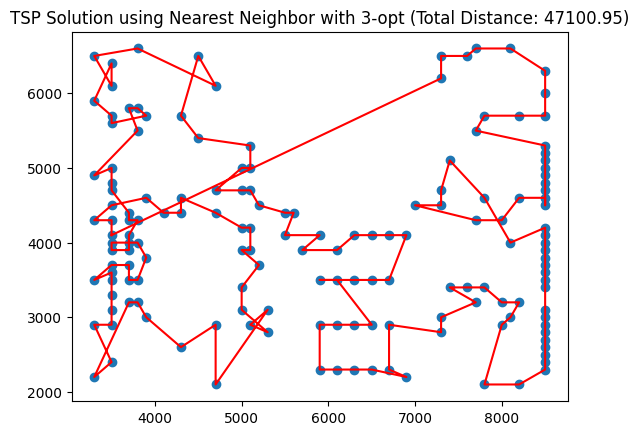

Time taken to render: 4492.723431825638 seconds


Average Tour Length: 46682.80723796645
Time taken to render: 4492.723954677582 seconds


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 3):
                for j in range(i + 2, self.n - 1):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        new_tour = self.three_opt_swap(tour, i, j, k)
                        if self.total_distance(new_tour) < self.total_distance(tour):
                            tour = new_tour
                            improvement = True
                            print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "u159.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(2):
    start_time = time.time()
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")
